<a href="https://colab.research.google.com/github/GParrino/Coursera_Capstone/blob/master/CapstoneProjectBarcelonaCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First part: historical trends for rents and sales from 2014 to 2018

In [0]:
# import lybraries
# https://www.expatica.com/es/moving/location/where-to-live-in-barcelona-101435/
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Rents

In [0]:
# Only the Total numbers will be analyzed, divided in the 10 districts
# Building the dataframe for rents
from google.colab import drive
drive.mount('/gdrive')
foldername = '/gdrive/My Drive/Barcelona_project/'

df_2014 = pd.read_csv(foldername + "2014_lloguer_preu_trim.csv")
df_2015 = pd.read_csv(foldername + "2015_lloguer_preu_trim.csv")
df_2016 = pd.read_csv(foldername + "2016_lloguer_preu_trim.csv")
df_2017 = pd.read_csv(foldername + "2017_lloguer_preu_trim.csv")
df_2018 = pd.read_csv(foldername + "2018_lloguer_preu_trim.csv")

df_array = [df_2014, df_2015, df_2016, df_2017, df_2018]
df_rents = pd.concat(df_array)

print(df_rents.shape) # 5 x 584 = 2920 rows
df_rents.head()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
(2920, 8)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2014,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),589.55
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),712.79
2,2014,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),540.71
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),673.44
4,2014,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),736.09


In [0]:
# Cleaning the database

df_rents = df_rents[(df_rents.Preu > 0)] # Some rows have NaN values
print(df_rents.shape)

# Splitting the database in 2: Average monthly rent and Average monthly rent / m2

df_rents_avg = df_rents[(df_rents.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)')]
df_rents_avg.reset_index(drop = True, inplace = True) 
print(df_rents_avg.shape)

df_rents_avg_m2 = df_rents[(df_rents.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)')]
df_rents_avg_m2.reset_index(drop = True, inplace = True)
print(df_rents_avg_m2.shape)

df_rents_avg_m2.head()

(2736, 8)
(1368, 8)
(1368, 8)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2014,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),10.76
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),10.58
2,2014,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),14.40
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),11.01
4,2014,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),10.42


In [0]:
print(df_rents.Nom_Districte.unique())
print(df_rents.Nom_Districte.unique().shape)
print(len(df_rents.Nom_Districte.unique()))

['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']
(10,)
10


These 10 districts will be our lines in the chart Average Rent / Sales vs. Quarter / Year

In [0]:
# Condensing the data for the same District for Quarter

df_rents_avg_small = pd.DataFrame(columns = ['Codi_Districte', 'Any', 'Trimestre', 'Preu'])


for district in df_rents_avg.Codi_Districte.unique():
    for year in df_rents_avg.Any.unique():
        for quarter in df_rents_avg.Trimestre.unique():
            df_dummy = df_rents_avg[((df_rents_avg.Codi_Districte == district) & (df_rents_avg.Any == year) 
                                             & (df_rents_avg.Trimestre == quarter))]
            preu = df_dummy.Preu.mean() 
            
            dummy_list = pd.DataFrame([[district, year, quarter, preu]], 
                                      columns = ['Codi_Districte', 'Any', 'Trimestre', 'Preu'])
                     
            df_rents_avg_small = pd.concat([df_rents_avg_small, dummy_list], ignore_index = True)            

In [0]:
# Condensing the data for the same District for Quarter

df_rents_avg_m2_small = pd.DataFrame(columns = ['Codi_Districte', 'Any', 'Trimestre', 'Preu'])


for district in df_rents_avg_m2.Codi_Districte.unique():
    for year in df_rents_avg_m2.Any.unique():
        for quarter in df_rents_avg_m2.Trimestre.unique():
            df_dummy = df_rents_avg_m2[((df_rents_avg.Codi_Districte == district) & (df_rents_avg.Any == year) 
                                             & (df_rents_avg.Trimestre == quarter))]
            preu = df_dummy.Preu.mean() 
            
            dummy_list = pd.DataFrame([[district, year, quarter, preu]], 
                                      columns = ['Codi_Districte', 'Any', 'Trimestre', 'Preu'])
                     
            df_rents_avg_m2_small = pd.concat([df_rents_avg_m2_small, dummy_list], ignore_index = True) 

In [0]:
df_rents_avg_m2_small.head()

,Codi_Districte,Any,Trimestre,Preu
0,1,2014,1,11.6875
1,1,2014,2,11.6150
2,1,2014,3,11.9900
3,1,2014,4,12.1125
4,1,2015,1,12.0575


### Creating charts

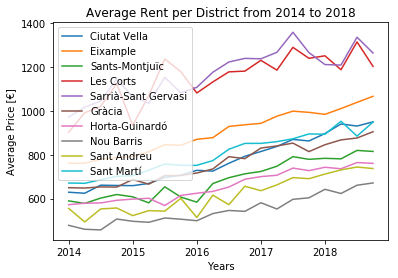

In [0]:
x_axis = np.empty(0)

for year in df_rents_avg_small.Any.unique():
        for quarter in df_rents_avg_small.Trimestre.unique():
            x_axis = np.append(x_axis, year + (quarter-1)/4)

for j in range(len(df_rents.Nom_Districte.unique())):
    plt.plot(x_axis, df_rents_avg_small.Preu[(df_rents_avg_small.Codi_Districte == j + 1)])
    
plt.title('Average Rent per District from 2014 to 2018')
plt.ylabel('Average Price [€]')
plt.xlabel('Years')
plt.legend(df_rents.Nom_Districte.unique(), loc = 'upper left')
    
plt.show()

In [0]:
# Table District vs. Value 

al = np.empty(0)
percent = pd.DataFrame(columns = ['DistrictName', 'DistrictCode', 'RentsValue', 'RentsM2Value','SalesValue'])

for j in range(len(df_rents.Nom_Districte.unique())):
    a0 = np.array(df_rents_avg_small.Preu[(df_rents_avg_small.Codi_Districte == j + 1) & 
                                    (df_rents_avg_small.Any == 2014) &
                                    (df_rents_avg_small.Trimestre == 1)])   
    
    #print(a0)
    aj = np.array(df_rents_avg_small.Preu[(df_rents_avg_small.Codi_Districte == j + 1) & 
                                    (df_rents_avg_small.Any == 2018) &
                                    (df_rents_avg_small.Trimestre == 4)])
    
    #print(aj)
    al = np.append(al,[(aj-a0)/a0 * 100])
    
percent.DistrictName = df_rents.Nom_Districte.unique()
percent.DistrictCode = df_rents.Codi_Districte.unique()
percent.RentsValue = al

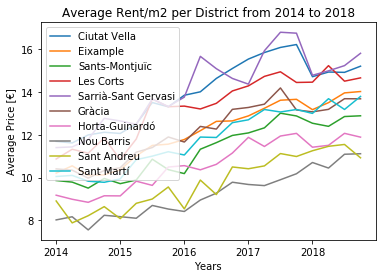

In [0]:
for j in range(len(df_rents.Nom_Districte.unique())):
    plt.plot(x_axis, df_rents_avg_m2_small.Preu[(df_rents_avg_m2_small.Codi_Districte == j + 1)])
    
plt.title('Average Rent/m2 per District from 2014 to 2018')
plt.ylabel('Average Price [€]')
plt.xlabel('Years')
plt.legend(df_rents.Nom_Districte.unique(), loc = 'upper left')
    
plt.show()

In [0]:
# Table District vs. Value 

al = np.empty(0)

for j in range(len(df_rents.Nom_Districte.unique())):
    a0 = np.array(df_rents_avg_m2_small.Preu[(df_rents_avg_m2_small.Codi_Districte == j + 1) & 
                                    (df_rents_avg_m2_small.Any == 2014) &
                                    (df_rents_avg_m2_small.Trimestre == 1)])   
    
    #print(a0)
    aj = np.array(df_rents_avg_m2_small.Preu[(df_rents_avg_m2_small.Codi_Districte == j + 1) & 
                                    (df_rents_avg_m2_small.Any == 2018) &
                                    (df_rents_avg_m2_small.Trimestre == 4)])
    
    #print(aj)
    al = np.append(al,[(aj-a0)/a0 * 100])
    
percent.RentsM2Value = al

## Sales

In [0]:
# Only the Total numbers will be analyzed, divided in the 10 districts
# Building the dataframe for rents

df_2014 = pd.read_csv(foldername + "2014_comp_vend_sup_trim.csv")
df_2015 = pd.read_csv(foldername + "2015_comp_vend_sup_trim.csv")
df_2016 = pd.read_csv(foldername + "2016_comp_vend_sup_trim.csv")
df_2017 = pd.read_csv(foldername + "2017_comp_vend_sup_trim.csv")
df_2018 = pd.read_csv(foldername + "2018_comp_vend_sup_trim.csv")

df_array = [df_2014, df_2015, df_2016, df_2017, df_2018]
df_sales = pd.concat(df_array)

print(df_sales.shape) # 5 x 584 = 5840 rows
df_sales.head()

(5840, 8)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Superfície_mitjana_(m2_construïts),Nombre
0,2014,1,1,Ciutat Vella,1,el Raval,Total,63.3
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,Total,104.8
2,2014,1,1,Ciutat Vella,3,la Barceloneta,Total,45.5
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,61.7
4,2014,1,2,Eixample,5,el Fort Pienc,Total,84.5


In [0]:
df_sales.columns = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Surface', 'Nombre'] # Some columns have exotic chars

In [0]:
# Cleaning the database

df_sales = df_sales[(df_sales.Nombre > 0)] # Some rows have NaN values
df_sales = df_sales[(df_sales.Surface == 'Total')]

print(df_sales.shape)
df_sales.head()

(1422, 8)


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Surface,Nombre
0,2014,1,1,Ciutat Vella,1,el Raval,Total,63.3
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,Total,104.8
2,2014,1,1,Ciutat Vella,3,la Barceloneta,Total,45.5
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Total,61.7
4,2014,1,2,Eixample,5,el Fort Pienc,Total,84.5


In [0]:
# Condensing the data for the same District for Quarter

df_sales_small = pd.DataFrame(columns = ['Codi_Districte', 'Any', 'Trimestre', 'Nombre'])

for district in df_sales.Codi_Districte.unique():
    for year in df_sales.Any.unique():
        for quarter in df_sales.Trimestre.unique():
            df_dummy = df_sales[((df_sales.Codi_Districte == district) & (df_sales.Any == year) 
                                             & (df_sales.Trimestre == quarter))]
            nombre = df_dummy.Nombre.mean() 
            
            dummy_list = pd.DataFrame([[district, year, quarter, nombre]], 
                                      columns = ['Codi_Districte', 'Any', 'Trimestre', 'Nombre'])
                     
            df_sales_small = pd.concat([df_sales_small, dummy_list], ignore_index = True)  
            
df_sales_small.head(20)

,Codi_Districte,Any,Trimestre,Nombre
0,1,2014,1,68.825
1,1,2014,2,68.900
2,1,2014,3,69.625
3,1,2014,4,68.250
4,1,2015,1,72.075
5,1,2015,2,77.250
6,1,2015,3,72.775
7,1,2015,4,61.275
8,1,2016,1,66.375
9,1,2016,2,70.125


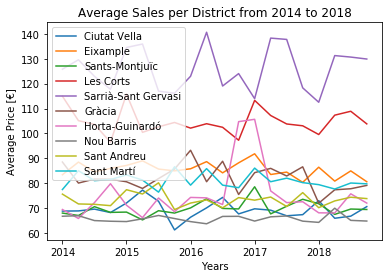

In [0]:
x_axis = np.empty(0)

for year in df_sales_small.Any.unique():
        for quarter in df_sales_small.Trimestre.unique():
            x_axis = np.append(x_axis, year + (quarter-1)/4)

for j in range(len(df_sales.Nom_Districte.unique())):
    plt.plot(x_axis, df_sales_small.Nombre[(df_sales_small.Codi_Districte == j + 1)])
    
plt.title('Average Sales per District from 2014 to 2018')
plt.ylabel('Average Price [k€]')
plt.xlabel('Years')
plt.legend(df_sales.Nom_Districte.unique(), loc = 'upper left')
    
plt.show()

In [0]:
# Table District vs. Value 

al = np.empty(0)

for j in range(len(df_rents.Nom_Districte.unique())):
    a0 = np.array(df_sales_small.Nombre[(df_sales_small.Codi_Districte == j + 1) & 
                                    (df_sales_small.Any == 2014) &
                                    (df_sales_small.Trimestre == 1)])   
    
    #print(a0)
    aj = np.array(df_sales_small.Nombre[(df_sales_small.Codi_Districte == j + 1) & 
                                    (df_sales_small.Any == 2018) &
                                    (df_sales_small.Trimestre == 4)])
    
    #print(aj)
    al = np.append(al,[(aj-a0)/a0 * 100])

percent.SalesValue = al
percent

,DistrictName,DistrictCode,RentsValue,RentsM2Value,SalesValue
0,Ciutat Vella,1,50.934436,30.010695,2.615329
1,Eixample,2,40.001620,37.273469,-3.356643
2,Sants-Montjuïc,3,38.193336,30.605446,2.112805
3,Les Corts,4,33.220556,34.815951,-9.657773
4,Sarrià-Sant Gervasi,5,30.049369,38.587513,3.246323
5,Gràcia,6,39.229024,31.404959,-10.596475
6,Horta-Guinardó,7,32.866642,29.505339,3.708939
7,Nou Barris,8,40.358805,38.456224,-2.891249
8,Sant Andreu,9,32.665005,22.597889,-2.370161
9,Sant Martí,10,41.355651,37.150532,2.942315


# Second part: geo-analysis of public transports

## Opening datasets

In [0]:
# Open bus station dataset

df_bus = pd.read_csv(foldername + "bus_stations.csv")
df_bus.head()

,CODI_CAPA,CAPA_GENERICA,NOM_CAPA,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LONGITUD,LATITUD,EQUIPAMENT,DISTRICTE,BARRI,NOM_DISTRICTE,NOM_BARRI,ADRECA,TELEFON
0,K014,Transports i serveis relacionats,Autobusos diürns,428791.068,4585039.461,428699.152,4584838.501,2.146875,41.411935,BUS -87--,6.0,28.0,Gràcia,Vallcarca i els Penitents,NaN,NaN
1,K016,Transports i serveis relacionats,Autobus a l'aeroport,430766.260,4582292.013,430674.325,4582091.078,2.170821,41.387362,AEROBUS -A2--,2.0,7.0,Eixample,la Dreta de l'Eixample,NaN,NaN
2,K014,Transports i serveis relacionats,Autobusos diürns,429170.590,4580920.343,429078.670,4580719.421,2.151898,41.374869,BUS -L70--,3.0,11.0,Sants-Montjuïc,el Poble-sec,NaN,NaN
3,K015,Transports i serveis relacionats,Autobusos nocturns,431376.348,4581004.947,431284.407,4580804.024,2.178263,41.375823,NITBUS -N0--,1.0,2.0,Ciutat Vella,el Barri Gòtic,NaN,NaN
4,K015,Transports i serveis relacionats,Autobusos nocturns,428566.477,4581967.626,428474.562,4581766.695,2.144551,41.384248,NITBUS -N0--,2.0,9.0,Eixample,la Nova Esquerra de l'Eixample,NaN,NaN


In [0]:
# Open transports spots dataset

df_tr = pd.read_csv(foldername + "transports_spots.csv")
df_tr.head()

,CODI_CAPA,CAPA_GENERICA,NOM_CAPA,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LONGITUD,LATITUD,EQUIPAMENT,DISTRICTE,BARRI,NOM_DISTRICTE,NOM_BARRI,ADRECA,TELEFON
0,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,428480.365,4586484.614,428388.453,4586283.641,2.142987,41.424923,"METRO (L3, L5) - VALL D'HEBRON (C. de les Bass...",7.0,41.0,Horta-Guinardó,la Vall d'Hebron,NaN,NaN
1,K002,Transports i serveis relacionats,Ferrocarrils Generalitat (FGC),429726.943,4582853.670,429635.018,4582652.730,2.158326,41.392331,FGC - PROVENÇA (C. de Provença)-,2.0,8.0,Eixample,l'Antiga Esquerra de l'Eixample,NaN,NaN
2,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,426477.889,4583649.008,426385.994,4583448.062,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,5.0,23.0,Sarrià-Sant Gervasi,Sarrià,NaN,NaN
3,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,427818.595,4583478.761,427726.688,4583277.816,2.135427,41.397791,FGC (L6) - LA BONANOVA-,5.0,26.0,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,NaN,NaN
4,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,432051.444,4589400.176,431959.500,4589199.175,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,8.0,53.0,Nou Barris,la Trinitat Nova,NaN,NaN


## Creating districts dataset with coordinates

### Coordinates of the districts

In [0]:
from geopy.geocoders import Nominatim # get Barcelona latitude and longitude values

address = 'Barcelona'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lat_barca = location.latitude
long_barca = location.longitude
print('The geographical coordinates of Barcelona are {}, {}.'.format(lat_barca, long_barca))

The geographical coordinates of Barcelona are 41.3828939, 2.1774322.


In [0]:
# Table Districts vs. Code
districts = df_bus["NOM_DISTRICTE"].unique()
table = pd.DataFrame(columns = ['District', 'Code'])

for j in range(len(districts)):
  code = df_bus["DISTRICTE"].unique()
  dummy_list = pd.DataFrame([[districts[j], code[j]]], columns = ['District', 'Code'])
  table = pd.concat([table, dummy_list], ignore_index = True)

table.dropna(inplace = True)

In [0]:
# Coordinates of the districts

coords = pd.DataFrame(columns = ['Nom_Districte', 'Codi_Districte', 'Latitude', 'Longitude'])

for j in range(len(table)):
  
  address = str(table.District[j])
  code = table.Code[j]
  geolocator = Nominatim (user_agent="ny_explorer")
  location = geolocator.geocode(address + " Barcelona ")
  latitude = location.latitude
  longitude = location.longitude
  dummy_list = pd.DataFrame([[address, code, latitude, longitude]], columns = ['Nom_Districte', 'Codi_Districte', 'Latitude', 'Longitude'])
  coords = pd.concat([coords, dummy_list])

coords.dropna(inplace = True)
coords.sort_values('Codi_Districte', inplace = True)
coords.reset_index(inplace = True, drop = True)
coords.head(10)


,Nom_Districte,Codi_Districte,Latitude,Longitude
0,Ciutat Vella,1.0,41.374962,2.173265
1,Eixample,2.0,41.393394,2.166085
2,Sants-Montjuïc,3.0,41.340224,2.133335
3,Les Corts,4.0,41.388452,2.121718
4,Sarrià-Sant Gervasi,5.0,41.413043,2.108356
5,Gràcia,6.0,41.410171,2.155136
6,Horta-Guinardó,7.0,41.428540,2.143597
7,Nou Barris,8.0,41.446727,2.172565
8,Sant Andreu,9.0,41.437439,2.196859
9,Sant Martí,10.0,41.406759,2.203688


### Coordinates of the barrios

In [0]:
# Table Districts vs. Code
barrios = df_bus["NOM_BARRI"].unique()
table = pd.DataFrame(columns = ['Barrio', 'Code'])

for j in range(len(barrios)):
  code = df_bus["BARRI"].unique()
  dummy_list = pd.DataFrame([[barrios[j], code[j]]], columns = ['Barrio', 'Code'])
  table = pd.concat([table, dummy_list], ignore_index = True)

table.dropna(inplace = True)

#Need replacement for Nominatim macro
table.Barrio[table.Barrio == 'Vallvidrera, el Tibidabo i les Planes'] = 'Vallvidrera, el Tibidabo'

table.sort_values(by = 'Code', inplace = True)
table.reset_index(drop = True, inplace = True)
table

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Barrio,Code
0,el Raval,1.0
1,el Barri Gòtic,2.0
2,la Barceloneta,3.0
3,"Sant Pere, Santa Caterina i la Ribera",4.0
4,el Fort Pienc,5.0
5,la Sagrada Família,6.0
6,la Dreta de l'Eixample,7.0
7,l'Antiga Esquerra de l'Eixample,8.0
8,la Nova Esquerra de l'Eixample,9.0
9,Sant Antoni,10.0


In [0]:
# Coordinates of the barrios

coorbars = pd.DataFrame(columns = ['Nom_Barrio', 'Codi_Barrio', 'Latitude', 'Longitude'])

for j in range(len(table)):
  
  address = str(table.Barrio[j])
  code = table.Code[j]
  geolocator = Nominatim (user_agent="ny_explorer")
  location = geolocator.geocode(address + " Barcelona ")
  latitude = location.latitude
  longitude = location.longitude
  #print(address, code, latitude, longitude)
  dummy_list = pd.DataFrame([[address, code, latitude, longitude]], columns = ['Nom_Barrio', 'Codi_Barrio', 'Latitude', 'Longitude'])
  coorbars = pd.concat([coorbars, dummy_list], sort = True)

coorbars.dropna(inplace = True)
coorbars.sort_values('Codi_Barrio', inplace = True)
coorbars.reset_index(inplace = True, drop = True)
coorbars.head(10)

,Codi_Barrio,Latitude,Longitude,Nom_Barrio
0,1.0,41.379518,2.168368,el Raval
1,2.0,41.381505,2.177418,el Barri Gòtic
2,3.0,41.380653,2.189927,la Barceloneta
3,4.0,41.386010,2.177838,"Sant Pere, Santa Caterina i la Ribera"
4,5.0,41.395925,2.182325,el Fort Pienc
5,6.0,41.403479,2.174410,la Sagrada Família
6,7.0,41.394124,2.166471,la Dreta de l'Eixample
7,8.0,41.388765,2.156598,l'Antiga Esquerra de l'Eixample
8,9.0,41.382706,2.150036,la Nova Esquerra de l'Eixample
9,10.0,41.380578,2.160102,Sant Antoni


## Barcharts

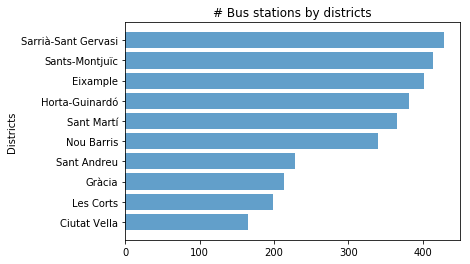

In [0]:
# Barh chart

a = df_bus["NOM_DISTRICTE"].value_counts()
a = a.sort_values()
districts = a.index.to_list()
vals = a.values

y_pos = np.arange(len(districts))

plt.barh(y_pos, vals, align = 'center', alpha = 0.7)
plt.yticks(y_pos,districts)
plt.ylabel('Districts')
plt.title('# Bus stations by districts')

plt.show()

In [0]:
# Counting by barrio

# df_bus["NOM_BARRI"].value_counts()
# df_tr["NOM_BARRI"].value_counts()

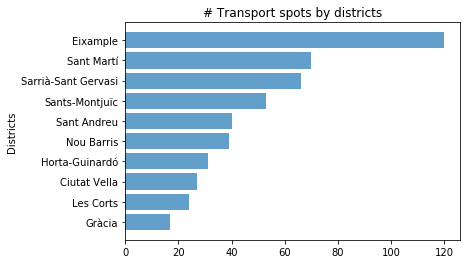

In [0]:
# Barh chart

a = df_tr["NOM_DISTRICTE"].value_counts()
a = a.sort_values()
districts = a.index.to_list()
vals = a.values

y_pos = np.arange(len(districts))

plt.barh(y_pos, vals, align = 'center', alpha = 0.7)
plt.yticks(y_pos,districts)
plt.ylabel('Districts')
plt.title('# Transport spots by districts')

plt.show()

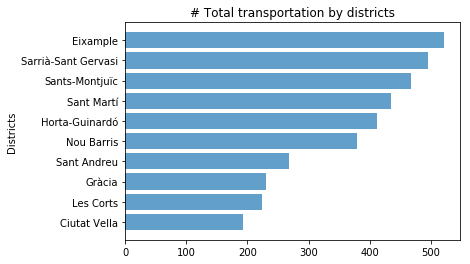

In [0]:
# Barh chart (all transports)

a = df_bus["NOM_DISTRICTE"].value_counts() + df_tr["NOM_DISTRICTE"].value_counts()
b = df_bus["DISTRICTE"].value_counts() + df_tr["DISTRICTE"].value_counts()
a = a.sort_values()
b = b.sort_index()
districts = a.index.to_list()

vals = a.values

y_pos = np.arange(len(districts))

plt.barh(y_pos, vals, align = 'center', alpha = 0.7)
plt.yticks(y_pos,districts)
plt.ylabel('Districts')
plt.title('# Total transportation by districts')

plt.show()

## Creating map

In [0]:
# Circle radius proportional to rent

rxs = coords
rxs['Preu'] = np.asarray(df_rents_avg_m2_small[(df_rents_avg_m2_small.Any == 2018) & (df_rents_avg_m2_small.Trimestre == 4)].Preu)

mean_preu = rxs.Preu.mean()
std_preu = rxs.Preu.std()

# Opacity proportional to services

rxs['Services'] = np.asarray(b)

max_opa = rxs.Services.max()
min_opa = rxs.Services.min()
mean_opa = rxs.Services.mean()
std_opa = rxs.Services.std()

In [0]:
import folium

# create map of Barcelona using latitude and longitude values
map_barcelona = folium.Map(location=[lat_barca, long_barca], zoom_start=12)

# add markers to map
for lat, lng, label, preu, opa in zip(rxs['Latitude'], rxs['Longitude'], rxs['Nom_Districte'], rxs['Preu'], rxs['Services']):
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 25 * np.abs(preu  - mean_preu)/std_preu,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = (opa-min_opa) / max_opa,
        parse_html = False).add_to(map_barcelona)
        
map_barcelona

# Explore the neighborhood by Foursquare API

In [0]:
import requests

In [0]:
CLIENT_ID = '1JJ2UBMLUE0M150OCS51HB3NEQ0LPY5BYD5BB0TFTGVFVRNB' # your Foursquare ID
CLIENT_SECRET = '03ENNGPSGSP3UQAVAV11JCB50HG4DU4H10Q5Y1DCEHRIO5KP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 1JJ2UBMLUE0M150OCS51HB3NEQ0LPY5BYD5BB0TFTGVFVRNB
CLIENT_SECRET:03ENNGPSGSP3UQAVAV11JCB50HG4DU4H10Q5Y1DCEHRIO5KP


## Get venues by district and by barrio

In [0]:
def getNearbyVenues(names, codes, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, code, lat, lng in zip(names, codes, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            code,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Nom',
                  'Code',
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
barcelona_venues = getNearbyVenues(names = coords['Nom_Districte'], codes = coords['Codi_Districte'],
                                   latitudes = coords['Latitude'], longitudes = coords['Longitude'])

In [0]:
barcelona_barrios = getNearbyVenues(names = coorbars['Nom_Barrio'], codes = coorbars['Codi_Barrio'],
                                   latitudes = coorbars['Latitude'], longitudes = coorbars['Longitude'])

### Grouping the venues by District

In [0]:
df_count = barcelona_venues.groupby('Nom').count()
df_count.drop('Longitude', axis = 1, inplace = True)
df_count.drop('Latitude', axis = 1, inplace = True)
df_count.drop('Venue', axis = 1, inplace = True)
df_count.drop('Venue Latitude', axis = 1, inplace = True)
df_count.drop('Venue Longitude', axis = 1, inplace = True)
df_count.drop('Venue Category', axis = 1, inplace = True)

df_count.columns = ['Counts']

In [0]:
df_counter_dist = pd.DataFrame(columns = ['Nom_Districte', 'Venues'])
df_counter_dist.Nom_Districte = df_count.index
df_counter_dist.Venues = np.asarray(df_count.Counts)
df_counter_dist.sort_values(by = 'Venues', inplace = True, ascending = False)
df_counter_dist = df_counter.reset_index(drop = True)

In [0]:
df_counter_dist.sort_values(by = 'Nom_Districte', inplace = True)
coords.sort_values(by = 'Nom_Districte', inplace = True)
coords['Venues'] = np.asarray(df_counter.Venues)

coords.sort_values(by = 'Codi_Districte', inplace = True)
coords.reset_index(inplace = True, drop = True)
coords

,Nom_Districte,Codi_Districte,Latitude,Longitude,Preu,Services,Venues
0,Ciutat Vella,1.0,41.374962,2.173265,15.195000,192,89
1,Eixample,2.0,41.393394,2.166085,14.013333,522,100
2,Sants-Montjuïc,3.0,41.340224,2.133335,12.881429,467,5
3,Les Corts,4.0,41.388452,2.121718,14.650000,223,53
4,Sarrià-Sant Gervasi,5.0,41.413043,2.108356,15.796667,495,11
5,Gràcia,6.0,41.410171,2.155136,13.674000,231,75
6,Horta-Guinardó,7.0,41.428540,2.143597,11.886000,412,20
7,Nou Barris,8.0,41.446727,2.172565,11.113000,379,6
8,Sant Andreu,9.0,41.437439,2.196859,10.921429,268,77
9,Sant Martí,10.0,41.406759,2.203688,13.785000,435,27


### Grouping the venues by Barrio

In [0]:
df_count = barcelona_barrios.groupby('Nom').count()
df_count.drop('Longitude', axis = 1, inplace = True)
df_count.drop('Latitude', axis = 1, inplace = True)
df_count.drop('Venue', axis = 1, inplace = True)
df_count.drop('Venue Latitude', axis = 1, inplace = True)
df_count.drop('Venue Longitude', axis = 1, inplace = True)
df_count.drop('Venue Category', axis = 1, inplace = True)

df_count.columns = ['Counts']

In [0]:
df_counter_barrios = pd.DataFrame(columns = ['Nom_Barrio', 'Venues'])
df_counter_barrios.Nom_Barrio = df_count.index
df_counter_barrios.Venues = np.asarray(df_count.Counts)
df_counter_barrios.sort_values(by = 'Venues', inplace = True, ascending = False)
df_counter_barrios = df_counter_barrios.reset_index(drop = True)

In [0]:
df_counter_barrios.sort_values(by = 'Nom_Barrio', inplace = True)
coorbars.sort_values(by = 'Nom_Barrio', inplace = True)
coorbars['Venues'] = np.asarray(df_counter_barrios.Venues)

coorbars.sort_values(by = 'Codi_Barrio', inplace = True)
coorbars.reset_index(inplace = True, drop = True)
coorbars.head()

,Codi_Barrio,Latitude,Longitude,Nom_Barrio,Venues
0,1.0,41.379518,2.168368,el Raval,100
1,2.0,41.381505,2.177418,el Barri Gòtic,100
2,3.0,41.380653,2.189927,la Barceloneta,100
3,4.0,41.386010,2.177838,"Sant Pere, Santa Caterina i la Ribera",100
4,5.0,41.395925,2.182325,el Fort Pienc,42


In [0]:
max_venue = coorbars.Venues.max()
min_venue = coorbars.Venues.min()
mean_venue = coorbars.Venues.mean()
std_venue = coorbars.Venues.std()

In [0]:
# create map of Barcelona using latitude and longitude values
map_barcelona = folium.Map(location=[lat_barca, long_barca], zoom_start=12)

# add markers to map
for lat, lng, label, venue in zip(coorbars['Latitude'], coorbars['Longitude'], coorbars['Nom_Barrio'], coorbars['Venues']):
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 10 * np.abs(venue  - mean_venue)/std_venue,
        popup = label,
        color = 'yellow',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_barcelona)
        
map_barcelona

# Analyze the Barrios

In [0]:
print('There are {} uniques categories.'.format(len(barcelona_barrios['Venue'].unique())))

There are 2582 uniques categories.


## Evaluate Venue category

In [0]:
barcelona_barrios.head()

,Nom,Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,el Raval,1.0,41.379518,2.168368,Cera 23,41.378947,2.166180,Spanish Restaurant
1,el Raval,1.0,41.379518,2.168368,Arume,41.378953,2.166008,Spanish Restaurant
2,el Raval,1.0,41.379518,2.168368,Chulapio,41.379264,2.165905,Cocktail Bar
3,el Raval,1.0,41.379518,2.168368,A Tu Bola,41.380096,2.169054,Tapas Restaurant
4,el Raval,1.0,41.379518,2.168368,La Monroe,41.378795,2.170692,Spanish Restaurant


In [0]:
# one hot encoding
barrio_onehot = pd.get_dummies(barcelona_barrios[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
barrio_onehot['Nom_Barrio'] = barcelona_barrios['Nom'] 

# move neighborhood column to the first column
i = barrio_onehot.columns.get_loc('Nom_Barrio')
fixed_columns = [barrio_onehot.columns[i]] + list(barrio_onehot.columns[:(i-1)]) + list(barrio_onehot.columns[(i+1):])
barrio_onehot = barrio_onehot[fixed_columns]

barrio_onehot.head()

,Nom_Barrio,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boat Rental,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,...,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store
0,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,el Raval,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
barrio_grouped = barrio_onehot.groupby('Nom_Barrio').mean().reset_index()
barrio_grouped.head()

,Nom_Barrio,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Board Shop,Boat Rental,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,...,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Train Station,Tram Station,Transportation Service,Tunnel,Turkish Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store
0,Baró de Viver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Can Baró,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,...,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Can Peguera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canyelles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ciutat Meridiana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Sort in Pandas dataframe and display the top 10 venues for each neighborhood


In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [199]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Nom_Barrio']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
barrio_venues_sorted = pd.DataFrame(columns=columns)
barrio_venues_sorted['Nom_Barrio'] = barrio_grouped['Nom_Barrio']

for ind in np.arange(barrio_grouped.shape[0]):
    barrio_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barrio_grouped.iloc[ind, :], num_top_venues)

barrio_venues_sorted.head()

,Nom_Barrio,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baró de Viver,Plaza,Supermarket,Track Stadium,Park,Café,Burger Joint,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Empanada Restaurant
1,Can Baró,Spanish Restaurant,Scenic Lookout,Grocery Store,Basketball Court,Department Store,Café,Tapas Restaurant,Chinese Restaurant,Park,Dessert Shop
2,Can Peguera,Park,Food & Drink Shop,Supermarket,Basketball Stadium,Café,Grocery Store,Restaurant,Sports Club,Plaza,Hostel
3,Canyelles,Metro Station,Hot Spring,Market,Soccer Field,Mediterranean Restaurant,Café,Women's Store,Fabric Shop,Falafel Restaurant,Farm
4,Ciutat Meridiana,Park,Metro Station,Plaza,Grocery Store,Supermarket,Train Station,Falafel Restaurant,Empanada Restaurant,Ethiopian Restaurant,Exhibit


## Cluster the barrios by K-means

In [0]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [0]:
# set number of clusters
kclusters = 10

barrio_grouped_clustering = barrio_grouped.drop('Nom_Barrio', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(barrio_grouped_clustering)

In [209]:
# add clustering labels
barrio_venues_sorted['ClusterLabels'] =  kmeans.labels_

barrio_merged = coorbars

# merge barrio_grouped with coorbars to add latitude/longitude for each barrio
barrio_merged = barrio_merged.join(barrio_venues_sorted.set_index('Nom_Barrio'), on = 'Nom_Barrio')

barrio_merged.head()

,Codi_Barrio,Latitude,Longitude,Nom_Barrio,Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,ClusterLabels
0,1.0,41.379518,2.168368,el Raval,100,Spanish Restaurant,Bar,Cocktail Bar,Tapas Restaurant,Pizza Place,Restaurant,Mediterranean Restaurant,Hotel,Burger Joint,Sandwich Place,3
1,2.0,41.381505,2.177418,el Barri Gòtic,100,Spanish Restaurant,Tapas Restaurant,Bar,Italian Restaurant,Hotel,Plaza,Cocktail Bar,Pizza Place,Ice Cream Shop,Wine Bar,3
2,3.0,41.380653,2.189927,la Barceloneta,100,Bar,Mediterranean Restaurant,Tapas Restaurant,Paella Restaurant,Spanish Restaurant,Seafood Restaurant,Ice Cream Shop,Restaurant,Pizza Place,Burger Joint,3
3,4.0,41.386010,2.177838,"Sant Pere, Santa Caterina i la Ribera",100,Hotel,Spanish Restaurant,Tapas Restaurant,Plaza,Bar,Café,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Coffee Shop,3
4,5.0,41.395925,2.182325,el Fort Pienc,42,Chinese Restaurant,Sandwich Place,Coffee Shop,Café,Spanish Restaurant,Tram Station,Deli / Bodega,Restaurant,Stadium,Beer Bar,3


In [210]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barrio_merged['Latitude'], barrio_merged['Longitude'], barrio_merged['Nom_Barrio'], barrio_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters